# This is Assignment 1 ML 
`(KNN-Logistic Regression)`

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [4]:
# Load the Iris dataset 
iris = load_iris()
X = iris.data 
y = iris.target

# Split into 80% train and 20% test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

`Question for Reflection: Why is scaling important for KNN but less critical for Logistic Regression?`
* Because in KNN: it depends on measuring distance for all feature points, if a feature has a larger scale will affect distance calculations
* While in Logistic:less sensetive because it uses parameters not distances, but still scaling can help with convergence

# `KNN`

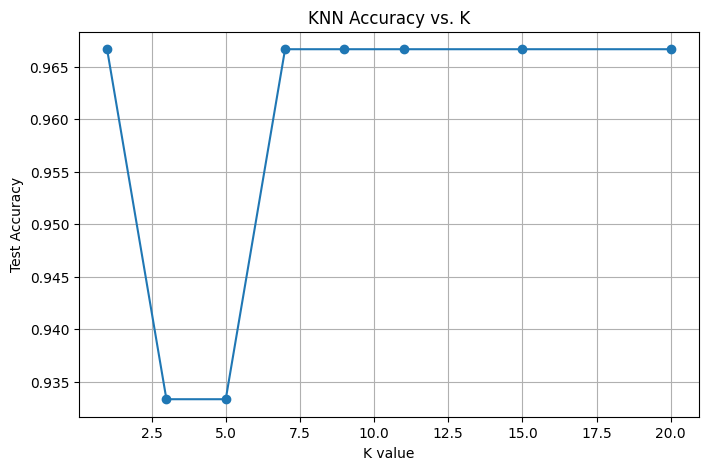

In [7]:
# KNN Model
k_values = [1,3,5,7,9,11,15,20]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc = knn.score(X_test, y_test)
    accuracies.append(acc)

# Plot a graph of accuracy vs. k for the test set.
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o')
plt.title('KNN Accuracy vs. K')
plt.xlabel('K value')
plt.ylabel('Test Accuracy')
plt.grid(True)
plt.show()

In [9]:
# Report the optimal k value and its test accuracy.
optimal_k = k_values[np.argmax(accuracies)]
best_knn_accuracy = max(accuracies)

print(f"Optimal K: {optimal_k}")
print(f"Best KNN Test Accuracy: {best_knn_accuracy:.4f}")


Optimal K: 1
Best KNN Test Accuracy: 0.9667


# `Logistic Regression`

In [17]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred_lr = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_lr)
print(f"\nLogistic Regression Test Accuracy: {accuracy:.4f}")


Logistic Regression Test Accuracy: 0.9333


In [18]:
# model’s coefficients 
coef_data = pd.DataFrame(model.coef_, columns=iris.feature_names)
coef_data.index = iris.target_names
print("\n Logistic Regression Coefficients:")
print(coef_data)



 Logistic Regression Coefficients:
            sepal length (cm)  sepal width (cm)  petal length (cm)  \
setosa              -1.088945          1.024208          -1.799056   
versicolor           0.536337         -0.360487          -0.204074   
virginica            0.552608         -0.663721           2.003130   

            petal width (cm)  
setosa             -1.686228  
versicolor         -0.807957  
virginica           2.494185  


`Question for Reflection: What do the coefficients tell you about feature importance?`
* coefficients shows how each feature contributes to predicting a class, larger coefficient values indicate more influence on model prediction, 
+ve signs means feature values increase the likelihood of that class occurence

In [22]:
# Model Comparison Best KNN Model
best_knn = KNeighborsClassifier(n_neighbors=optimal_k)
best_knn.fit(X_train, y_train)
y_pred_knn = best_knn.predict(X_test)

# Classification Report
print("\n📊 KNN Classification Report:")
print(classification_report(y_test, y_pred_knn, target_names=iris.target_names))

print("\n📊 Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr, target_names=iris.target_names))

# Confusion Matrics 
print(confusion_matrix(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_lr))




📊 KNN Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


📊 Logistic Regression Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


`Question for Reflection: Which model performed better? Why might this be the case?`
* `KNN` performed better than Logistic Regression, KNN Accuracy: 0.97 | Logistic Regression Accuracy: 0.93 , this is because KNN benefit from Scaling features than Logistic and KNN can model non linear class in the iris dataset

`Critical Thinking Questions`

# When might KNN be a better choice than Logistic Regression?
* when decision boundaries are nonlinear
* when dataset is small and low dimensional

# When might Logistic Regression be a better choice than KNN?
* When relationship is approximately Linear 
* when dataset is large


# How does the choice of k in KNN relate to the bias-variance tradeoff?
* small k -> low bias, high variance (can overfit)
* large k -> high bias, low variance (can underfit)

# Could Logistic Regression handle a dataset with 100 features? What challenges might arise?
* it can handle it, but challenges include multicollinearity, overfitting and longer training time
